In [6]:
# Loading libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector as SFS

import warnings
warnings.filterwarnings('ignore')

In [16]:
# Loading the data

df = pd.read_csv('Heart_Disease_Classification_Dataset_Cleaned.csv')

In [17]:
# Looking at the data

df.head()

,Unnamed: 0,Unnamed: 0.1,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,0,63,1,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,1
1,1,1,37,1,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,1
2,2,2,41,0,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,1
3,3,3,56,1,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,1
4,4,4,57,0,0,131.894925,354.0,0,1,163.0,1,0.6,2,0,2,1


In [18]:
# Dropping Unnamed (Index value, not relevant for analysis)

df2 = df.drop(["Unnamed: 0"], axis=1)
df2 = df2.drop(["Unnamed: 0.1"], axis=1)
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,131.894925,354.0,0,1,163.0,1,0.6,2,0,2,1


In [19]:
# Train/Test Split

X = df2.iloc[:, 0:13] 
y = df2.iloc[:, 13]

# Min-Max

mms = MinMaxScaler()
X_minmax = mms.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, train_size=0.8, stratify=y, random_state=0)

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

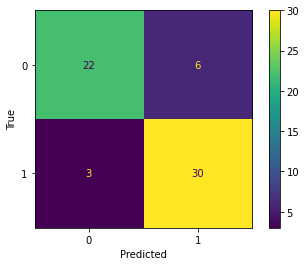

In [20]:
#Predict using SVM

clf = SVC(kernel = "linear", C = 9)
clf.fit(X_train, y_train)
y_pred =clf.predict(X_test)

cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

# Accuracy: 85.25%

SVC(C=1)


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

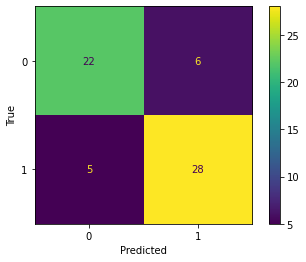

In [21]:
# Optimize Parameter Space

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 3, 5, 7, 9]} #set parameters for GridSearch
svc = SVC() # SVM object
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train) #Fit GridSearch object
print(clf.best_estimator_) 
y_pred = clf.predict(X_test) #Generate prediction

cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

# Accuracy: 81.97%

,2,3,4,7,11,12
0,0.000000,0.339623,0.358447,0.244275,0.00,1.000000
1,0.000000,0.320755,0.205479,0.458015,0.75,1.000000
2,0.666667,0.344654,0.212329,0.664122,0.00,0.666667
3,0.000000,0.150943,0.257991,0.419847,0.25,1.000000
4,0.000000,0.433962,0.392694,0.389313,0.75,1.000000


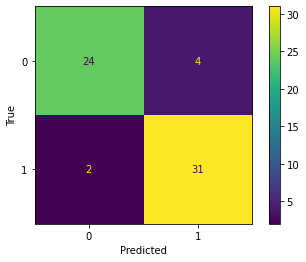

In [22]:
# Feature Selection

svc = SVC(kernel='linear', C=1) #create SVM object
selector = SFS(svc) #create Feature Selector object
selector.fit(X_train,y_train) #run feature selection

#Reduce your training set features selected
X_train_fs = selector.transform(X_train)
X_test_fs = selector.transform(X_test)

#Re-run SVM with selected features
svc.fit(X_train_fs, y_train)
y_pred = svc.predict(X_test_fs) 

cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

# Get selected features
X_train_df = pd.DataFrame(data=X_train)
features = selector.fit_transform(X_train,y_train) 
feature_idx = selector.get_support(indices=True)
feature_names = X_train_df.columns[feature_idx]
features = pd.DataFrame(features, columns=feature_names)
features.head()

# Accuracy: 90.1%
# Features: cp, trestbps, chol, thalach, ca, thal